In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import path
%matplotlib inline

In [2]:
# Read data
data = pd.read_csv('Task4DataSet/02_train.csv')

In [3]:
# Normalize the data
def norm(x):
    return (x - np.mean(x)) / np.std(x)

data = data.apply(norm, axis=1)
data = data.dropna(axis=1, how='all')

In [4]:
data.insert(loc=0,column='x_0_1',value=np.ones(len(data))) 

In [5]:
data.head(10)

,x_0_1,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_210,x_211,x_212,x_213,x_214,x_215,x_216,x_217,x_218,y
0,1.0,0.016737,0.094866,0.049996,-0.063434,-0.067607,0.209413,-0.060701,0.637224,-0.415998,...,0.443542,-0.315873,-0.126700,0.201840,0.406285,0.009040,-0.220307,0.258288,0.017356,-12.876626
1,1.0,0.130181,0.014563,-0.023550,-0.053955,-0.084043,-0.170972,0.122254,0.563913,-0.403015,...,0.352289,-0.922035,0.334647,0.015072,-0.003334,-0.055378,-0.039762,-0.412108,0.651505,-13.293890
2,1.0,-0.060110,0.967697,0.639067,-0.065087,-0.108558,-0.224665,0.145525,0.563405,-0.167031,...,0.456411,-0.280826,-0.137769,-0.267001,0.410826,0.009204,-0.293469,-0.042583,0.615035,-13.172955
3,1.0,0.120248,0.186841,0.403274,-0.016628,-0.101554,-0.033295,-0.770124,0.226673,-0.329206,...,0.447882,-0.582767,-0.273933,-0.352567,0.327542,-0.018651,-0.074995,-0.393920,1.200438,-13.034022
4,1.0,0.171606,-0.319913,0.585697,-0.053992,-0.077004,-0.177939,-0.252269,0.468994,-0.404478,...,0.384722,-0.882926,-0.305699,-0.188031,0.065402,0.020703,-0.283306,-1.033652,0.548604,-13.010577
5,1.0,-0.060054,0.190972,0.240518,-0.064063,-0.080433,-0.083493,0.302552,0.638542,-0.484141,...,0.343882,-0.467271,0.100997,0.214909,-0.433189,-0.142564,-0.260080,-0.315502,0.409255,-13.097090
6,1.0,0.205784,0.657303,0.076400,-0.001398,-0.058209,-0.038710,0.482888,0.676861,-0.413802,...,0.541670,-0.351909,0.168971,-0.807967,0.130530,-0.022542,-0.200441,-0.544548,0.723806,-12.804252
7,1.0,0.047392,-0.157287,0.759626,-0.050457,-0.067243,-0.359295,0.364433,0.715356,-0.439088,...,0.462904,-0.408292,-0.835675,0.157457,0.400202,-0.098136,-0.272060,0.212002,0.669979,-12.501088
8,1.0,0.206990,-0.191224,0.234936,-0.022922,-0.112365,-0.315831,-0.802703,0.588035,-0.216738,...,0.478090,-0.069372,-0.228702,-0.474241,-0.215659,-0.029809,-0.213860,0.244388,0.202959,-12.620584
9,1.0,0.092553,-0.468700,0.335256,-0.040116,-0.126588,-0.367271,-0.148808,0.526617,-0.345342,...,0.326219,0.122874,0.007225,-0.170249,-1.052021,-0.188021,-0.075854,-0.507008,0.870657,-12.543759


In [6]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [7]:
# Generating Coefficients
B = np.zeros(len(X.columns))
print(B)
X = np.array(X)
Y = np.array(Y)
print(X.dtype)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
float64


In [8]:
# HyperParameters 
learning_rate = 0.01
regularization_parameter = 0.01

In [9]:
# Defining Cost function
cost_function = lambda X,Y,B: np.sum(np.square(X.dot(B) - Y)) / (2.0 * len(Y))

In [10]:
initial_cost = cost_function(X,Y,B)
print(initial_cost)

20.96466358695749


In [11]:
# Writing Gradient Descent with L2 Ridge Regularization

def gradient_descent(X, Y, B, learning_rate, epochs,regularization_parameter):
    cost_history = []
    size = len(Y)
    for i in range(epochs):
        h = X.dot(B)
        loss = h - Y  - ( regularization_parameter / (2 * size) ) * np.sum(np.square(B))
        gradient = X.T.dot(loss) / size
        B = B - learning_rate * gradient 
        cost = cost_function(X,Y,B)
        if i % 10 == 0:
            cost_history.append(cost)
  
    return B, cost_history
    

In [12]:
newB, cost_history = gradient_descent(X, Y, B, learning_rate, 1000, regularization_parameter)

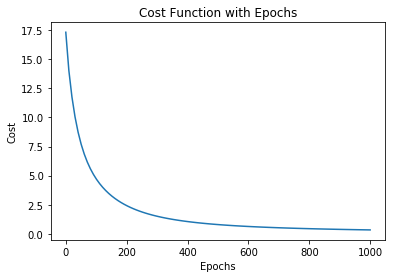

In [13]:
a = np.linspace(0,1000,100)
plt.plot(a, cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function with Epochs')
plt.show()

In [14]:
def rmse(Y, Y_pred):
    s = np.array(Y - Y_pred)
    s = np.array(s**2)
    s = np.sum(s)/ len(Y)
    return s

In [15]:
Y_pred = X.dot(newB)

In [16]:
print(rmse(Y, Y_pred))

0.6531482374727189
